# lsstCam med Pert00 qck 

First, find out the obshistid : 

In [1]:
import run_ps1_functions as func

In [16]:
func.calculate_obshistid('lsstCam', 'high', 'extra','qckBkgndPert05_hyak.cmd',1)

'9010131'

In [8]:
import os
root_dir = '/project/scichris/aos/AOS/DM-28360'
run=1
for instrument in  ['lsstCam']:
    for field in ['low',]:
        for position in ['focal', 'extra', 'intra']:
            for pert in ['00','05']:
                cmd_file = f'qckBkgndPert{pert}.cmd'
                obshistid = func.calculate_obshistid(instrument,field,position,cmd_file,run)
                print(instrument, field, position, pert, obshistid)
                inst_file= f'stars_{instrument}_PS1_{field}_{position}.inst'
                func.update_inst_file_obshistid(obshistid, inst_file, root_dir ) 

lsstCam low focal 00 9012021
Updated stars_lsstCam_PS1_low_focal.inst to stars_lsstCam_PS1_low_focal_9012021.inst in /project/scichris/aos/AOS/DM-28360
lsstCam low focal 05 9012031
Updated stars_lsstCam_PS1_low_focal.inst to stars_lsstCam_PS1_low_focal_9012031.inst in /project/scichris/aos/AOS/DM-28360
lsstCam low extra 00 9012121
Updated stars_lsstCam_PS1_low_extra.inst to stars_lsstCam_PS1_low_extra_9012121.inst in /project/scichris/aos/AOS/DM-28360
lsstCam low extra 05 9012131
Updated stars_lsstCam_PS1_low_extra.inst to stars_lsstCam_PS1_low_extra_9012131.inst in /project/scichris/aos/AOS/DM-28360
lsstCam low intra 00 9012221
Updated stars_lsstCam_PS1_low_intra.inst to stars_lsstCam_PS1_low_intra_9012221.inst in /project/scichris/aos/AOS/DM-28360
lsstCam low intra 05 9012231
Updated stars_lsstCam_PS1_low_intra.inst to stars_lsstCam_PS1_low_intra_9012231.inst in /project/scichris/aos/AOS/DM-28360


In [ ]:
Next: submit to   NCSA slurm  or NCSA condor  or hyak 
    
    

In [13]:
from lsst.obs.lsst import LsstCam
camera = LsstCam().getCamera()
sensorsAll = list(camera.getNameMap().keys())
#sensor = sensorsAll.ge
#detectors = camera.get('R24_S22')

for detector in camera:
    print(detector.getName(), detector.getSerial())
# for detector in detectors:
#     print(detector.getName(), detector)

R01_S00 ITL-3800C-083
R01_S01 ITL-3800C-226
R01_S02 ITL-3800C-136
R01_S10 ITL-3800C-034
R01_S11 ITL-3800C-072
R01_S12 ITL-3800C-095
R01_S20 ITL-3800C-164
R01_S21 ITL-3800C-227
R01_S22 ITL-3800C-231
R02_S00 ITL-3800C-269
R02_S01 ITL-3800C-261
R02_S02 ITL-3800C-205
R02_S10 ITL-3800C-160
R02_S11 ITL-3800C-244
R02_S12 ITL-3800C-157
R02_S20 ITL-3800C-423
R02_S21 ITL-3800C-318
R02_S22 ITL-3800C-376
R03_S00 ITL-3800C-342
R03_S01 ITL-3800C-210
R03_S02 ITL-3800C-467
R03_S10 ITL-3800C-432
R03_S11 ITL-3800C-454
R03_S12 ITL-3800C-451
R03_S20 ITL-3800C-088
R03_S21 ITL-3800C-461
R03_S22 ITL-3800C-458
R10_S00 ITL-3800C-466
R10_S01 ITL-3800C-040
R10_S02 ITL-3800C-167
R10_S10 ITL-3800C-223
R10_S11 ITL-3800C-350
R10_S12 ITL-3800C-438
R10_S20 ITL-3800C-377
R10_S21 ITL-3800C-446
R10_S22 ITL-3800C-207
R11_S00 E2V-CCD250-319
R11_S01 E2V-CCD250-321
R11_S02 E2V-CCD250-359
R11_S10 E2V-CCD250-364
R11_S11 E2V-CCD250-357
R11_S12 E2V-CCD250-363
R11_S20 E2V-CCD250-350
R11_S21 E2V-CCD250-365
R11_S22 E2V-CCD250-361
R

In [14]:
from lsst.obs.lsst import LsstComCam
camera = LsstComCam().getCamera()
#sensorsAll = list(camera.getNameMap().keys())
#sensor = sensorsAll.ge
#detectors = camera.get('R24_S22')

for detector in camera:
    print(detector.getName(), detector.getSerial())
# for detector in detectors:
#     print(detector.getName(), detector)

R22_S00 ITL-3800C-229
R22_S01 ITL-3800C-251
R22_S02 ITL-3800C-215
R22_S10 ITL-3800C-326
R22_S11 ITL-3800C-283
R22_S12 ITL-3800C-243
R22_S20 ITL-3800C-319
R22_S21 ITL-3800C-209
R22_S22 ITL-3800C-206


In [11]:
detectors.getSerial()

'E2V-CCD250-134'

In [11]:
from lsst.daf import butler as dafButler
import lsst.afw.cameraGeom.utils as cameraGeomUtils
import lsst.afw.display as afwDisplay
import matplotlib.pyplot as plt
from matplotlib import rcParams 
from astropy.io import fits
from astropy.visualization import ZScaleInterval

import numpy as np 
import os 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18
def plot_raw_postISR(repo_dir,instrument,detector='R22_S11'):
    
    butler = dafButler.Butler(repo_dir, collections=[f'{instrument}/raw/all',
                                                     f'{instrument}/calib','run1',
                                                     f'{instrument}/calib/unbounded'],
                           
                             )


    # this is just to get the exposure  number
    # so that we don't have  to guess...
    dataId0 = dict(instrument=instrument)
    dataset = next(iter(
                        butler.registry.queryDatasets(
                            datasetType='postISRCCD', 
                            collections=['run1'],
                            dataId=dataId0  )
                        )
                   )
    exp_num = dataset.dataId["exposure"]
    print(exp_num)
    zscale = ZScaleInterval()
     
    # initialize the figure 
    fig,ax = plt.subplots(1,2,figsize=(18,9))

    # get the raw exposure 
    exposure = butler.get('raw', detector=detector, instrument=instrument,
              exposure=exp_num,)

    data = exposure.image.array
    vmin, vmax = zscale.get_limits(data)
    ax[0].imshow(exposure.image.array, vmin=vmin,vmax=vmax,cmap='Greys',
                origin='lower')

    ax[0].set_title("raw")
    ax[0].set_xlabel('x [px]')
    ax[0].set_ylabel('y [px]')

    # get the postISR exposure 
    exposure = butler.get('postISRCCD', detector=detector, instrument=instrument,
              exposure=exp_num,collections=['run1'])

    data = exposure.image.array
    vmin, vmax = zscale.get_limits(data)
    ax[1].imshow(exposure.image.array, vmin=vmin,vmax=vmax,cmap='Greys',
                origin='lower')

    ax[1].set_title("postISR")
    ax[1].set_xlabel('x [px]')
    ax[1].set_ylabel('y [px]')
    fig.suptitle(f"{instrument} {exposure.getDetector().getName()}",
                fontsize=18)
    figtitle = f'{instrument}_{detector}_raw_postISR.png'
    plt.savefig(figtitle, bbox_inches='tight', dpi=100)
    print(f'Saved as {figtitle}')
    

plot just one sensor:

4021123111021
Saved as LSSTCam_R02_S22_raw_postISR.png


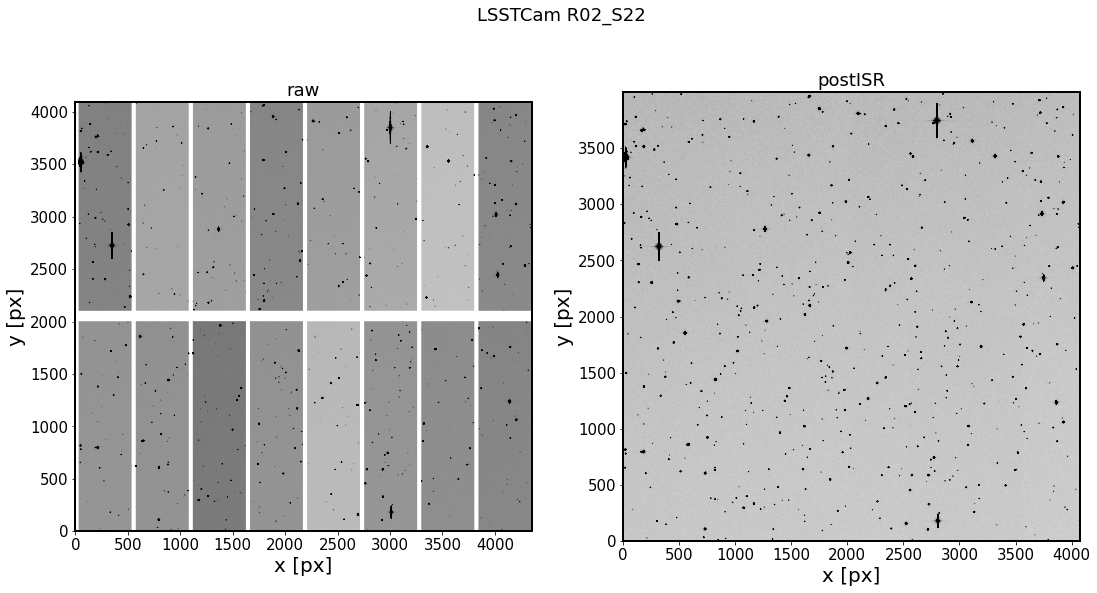

In [12]:
instrument='LSSTCam'
repo_dir = '/project/scichris/aos/AOS/DM-28360/lsstCam/med/focal/9011021/DATA/'
plot_raw_postISR(repo_dir,instrument, detector='R02_S22') 

plot the same with `cameraGeom`:

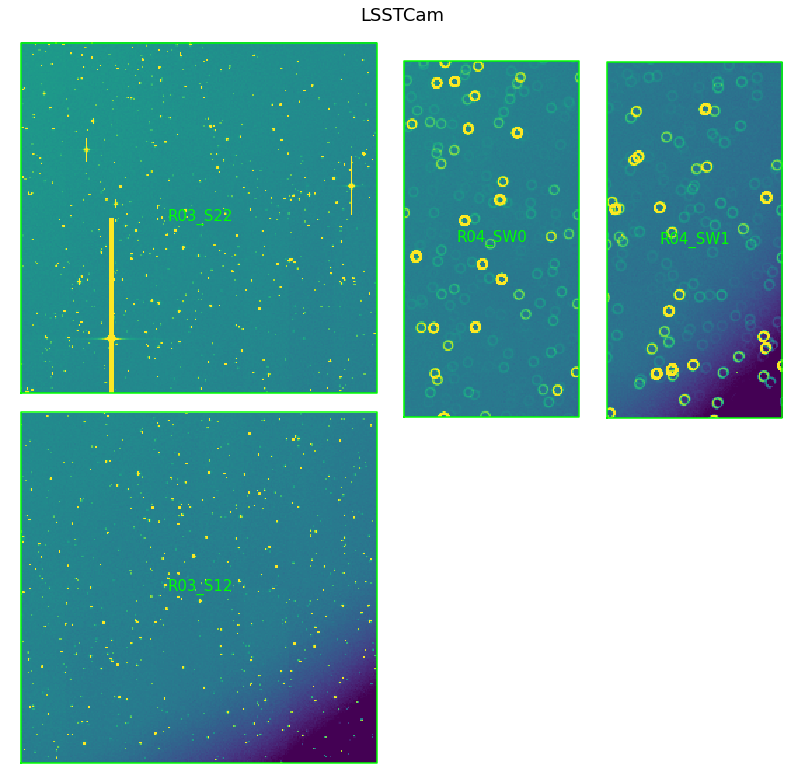

In [7]:
import run_ps1_functions as func
mos = func.plot_cameraGeom(repo_dir = repo_dir,
                      detectorNameList=['R03_S12', 'R03_S22', 'R04_SW0','R04_SW1'])

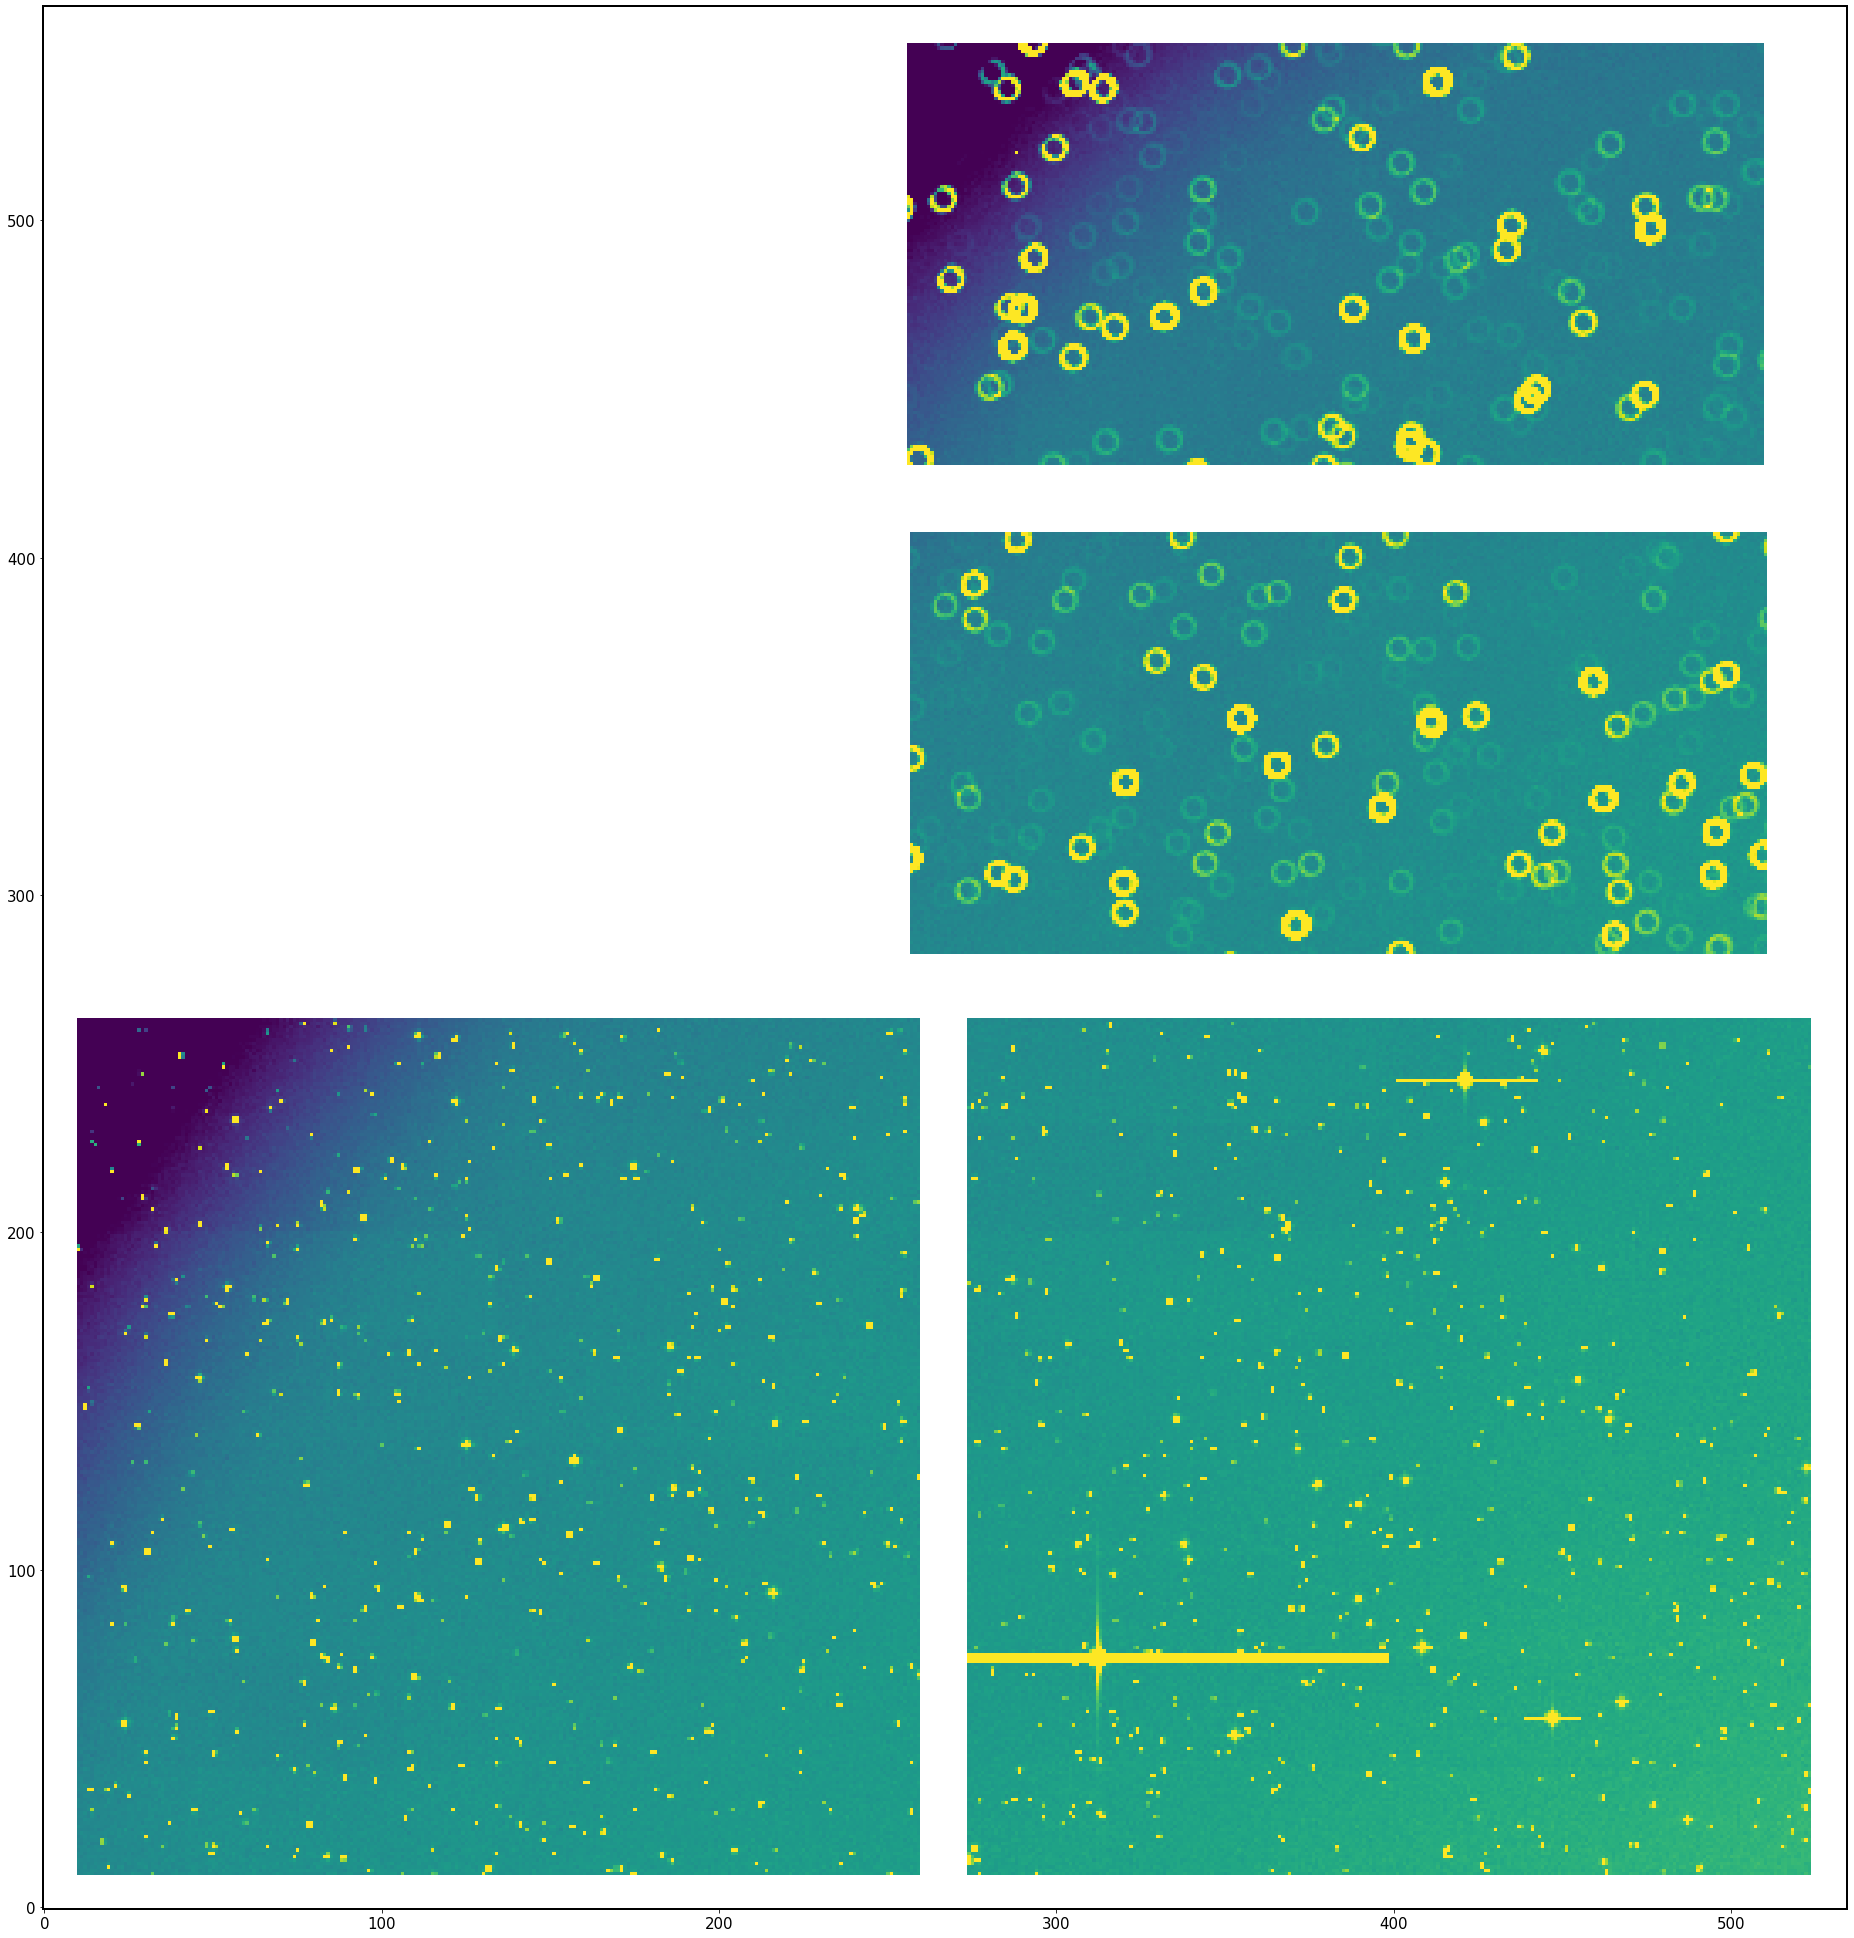

In [10]:
fig,ax = plt.subplots(1,1,figsize=(35,35))
zscale = ZScaleInterval()
vmin, vmax = zscale.get_limits(mos.array)
ax.imshow(mos.array.T, origin='lower', vmax=vmax, vmin=vmin)
#plt.savefig('letter_lsstCam_entire_tiled_LSST_before.pdf', bbox_inches='tight', dpi=150)


plot full focal plane

In [ ]:
mos = plot_cameraGeom(repo_dir = repo_dir, detectorNameList=None)
fig,ax = plt.subplots(1,1,figsize=(35,35))
zscale = ZScaleInterval()
vmin, vmax = zscale.get_limits(mos.array)
ax.imshow(mos.array.T, origin='lower', vmax=vmax, vmin=vmin)
plt.savefig('lsstCam_med_Pert00_qck_focal.png', bbox_inches='tight')


Reading 189: Dataset postISRCCD with data ID {instrument: 'LSSTCam', detector: 189, exposure: 4021123111021} could not be found in collections [LSSTCam/raw/all, LSSTCam/calib, run1, LSSTCam/calib/unbounded].
Reading 190: Dataset postISRCCD with data ID {instrument: 'LSSTCam', detector: 190, exposure: 4021123111021} could not be found in collections [LSSTCam/raw/all, LSSTCam/calib, run1, LSSTCam/calib/unbounded].
Reading 193: Dataset postISRCCD with data ID {instrument: 'LSSTCam', detector: 193, exposure: 4021123111021} could not be found in collections [LSSTCam/raw/all, LSSTCam/calib, run1, LSSTCam/calib/unbounded].
Reading 194: Dataset postISRCCD with data ID {instrument: 'LSSTCam', detector: 194, exposure: 4021123111021} could not be found in collections [LSSTCam/raw/all, LSSTCam/calib, run1, LSSTCam/calib/unbounded].
Reading 197: Dataset postISRCCD with data ID {instrument: 'LSSTCam', detector: 197, exposure: 4021123111021} could not be found in collections [LSSTCam/raw/all, LSSTCam

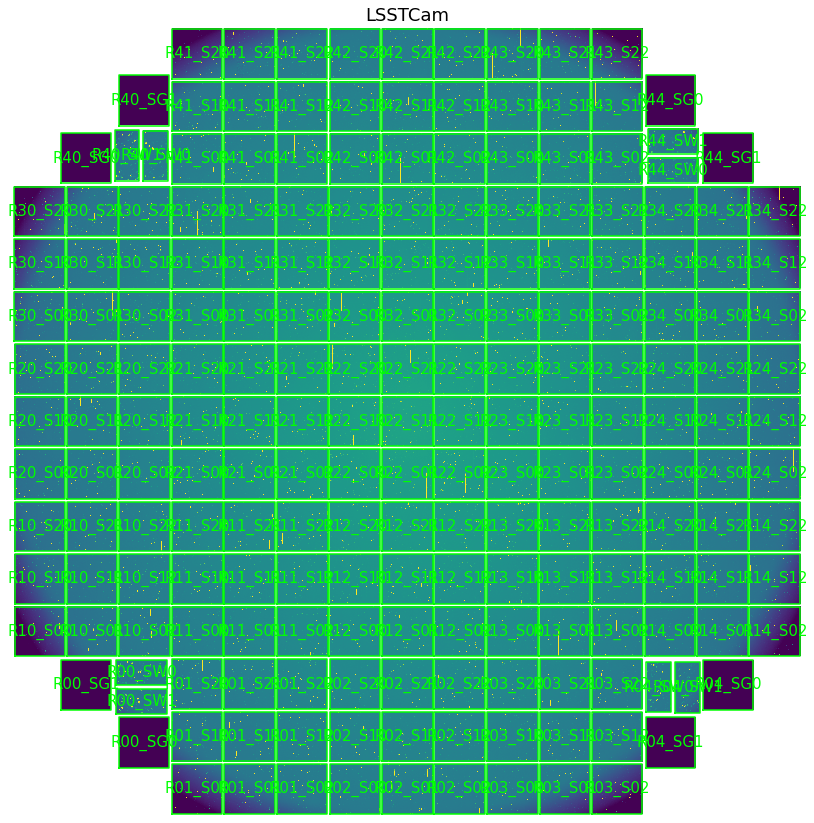

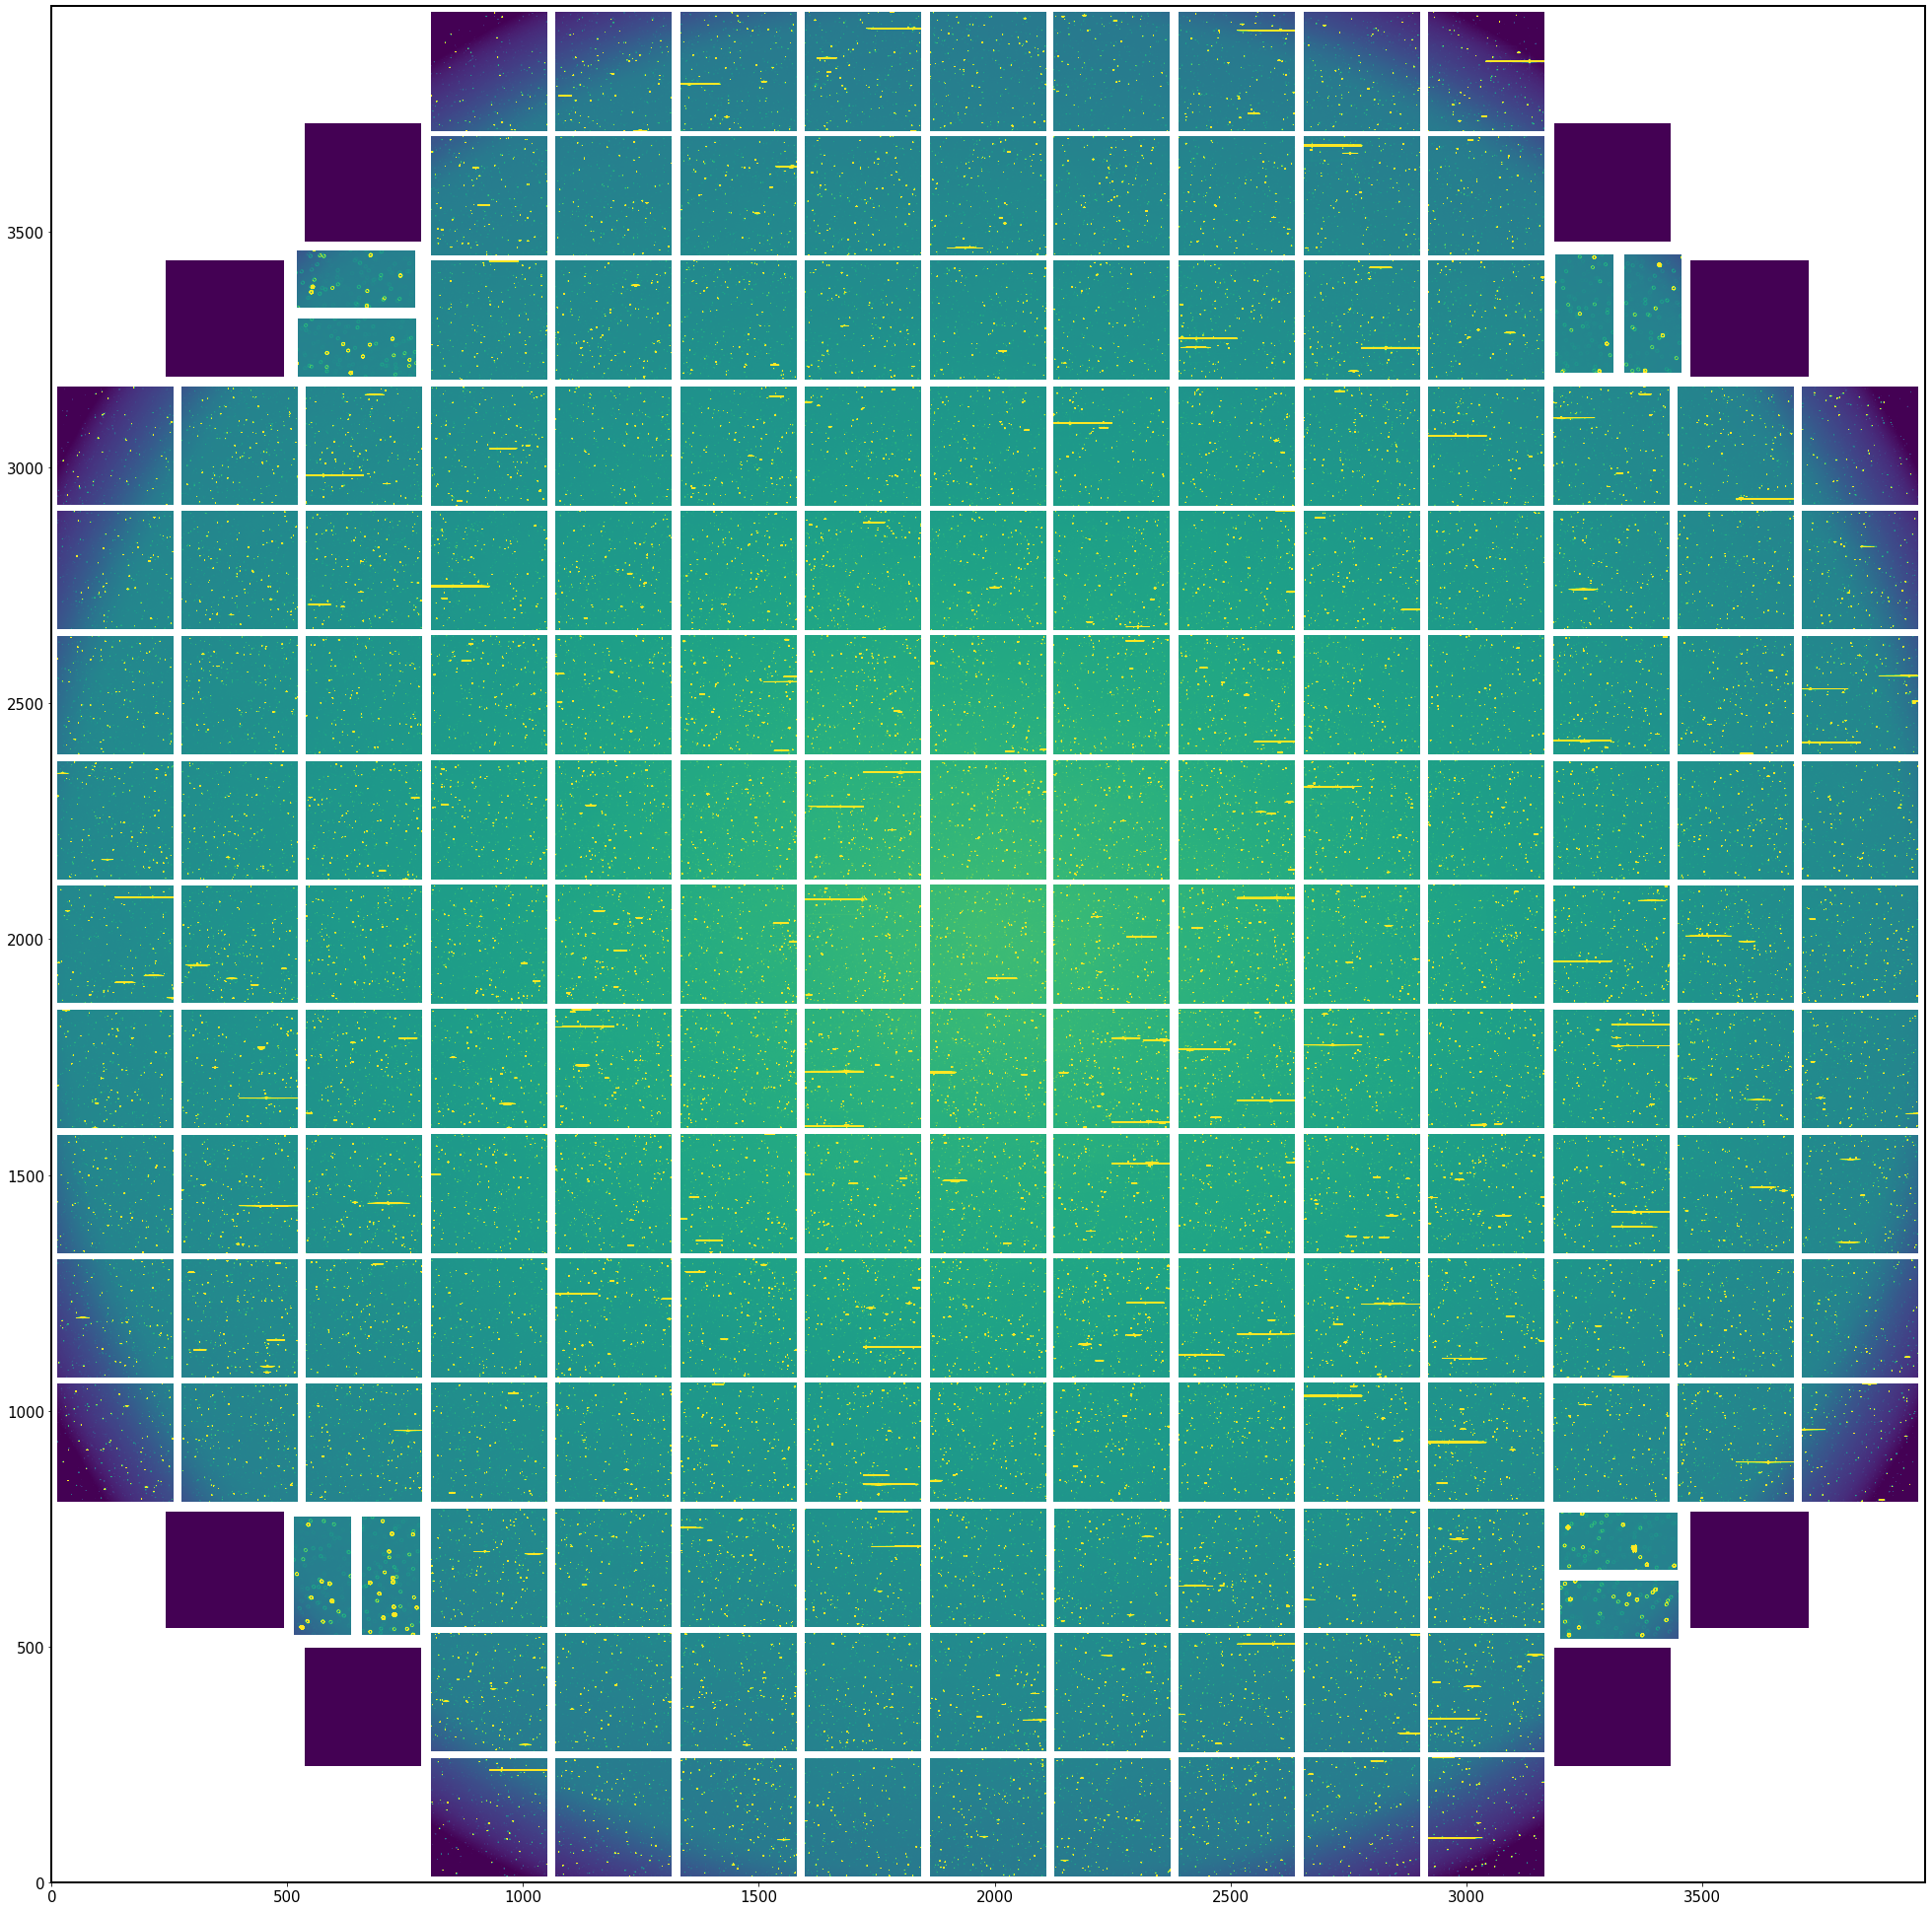

In [12]:
mos = func.plot_cameraGeom(repo_dir = repo_dir,
                      detectorNameList=None)  # in DVCS 
fig,ax = plt.subplots(1,1,figsize=(35,35))
zscale = ZScaleInterval()
vmin, vmax = zscale.get_limits(mos.array)

# in CCS 
ax.imshow(mos.array.T, origin='lower', vmax=vmax, vmin=vmin)
plt.savefig('lsstCam_med_Pert00_qck_focal.png', bbox_inches='tight')


Reading 189: Dataset postISRCCD with data ID {instrument: 'LSSTCam', detector: 189, exposure: 4021123111021} could not be found in collections [LSSTCam/raw/all, LSSTCam/calib, run1, LSSTCam/calib/unbounded].
Reading 190: Dataset postISRCCD with data ID {instrument: 'LSSTCam', detector: 190, exposure: 4021123111021} could not be found in collections [LSSTCam/raw/all, LSSTCam/calib, run1, LSSTCam/calib/unbounded].
Reading 193: Dataset postISRCCD with data ID {instrument: 'LSSTCam', detector: 193, exposure: 4021123111021} could not be found in collections [LSSTCam/raw/all, LSSTCam/calib, run1, LSSTCam/calib/unbounded].
Reading 194: Dataset postISRCCD with data ID {instrument: 'LSSTCam', detector: 194, exposure: 4021123111021} could not be found in collections [LSSTCam/raw/all, LSSTCam/calib, run1, LSSTCam/calib/unbounded].
Reading 197: Dataset postISRCCD with data ID {instrument: 'LSSTCam', detector: 197, exposure: 4021123111021} could not be found in collections [LSSTCam/raw/all, LSSTCam

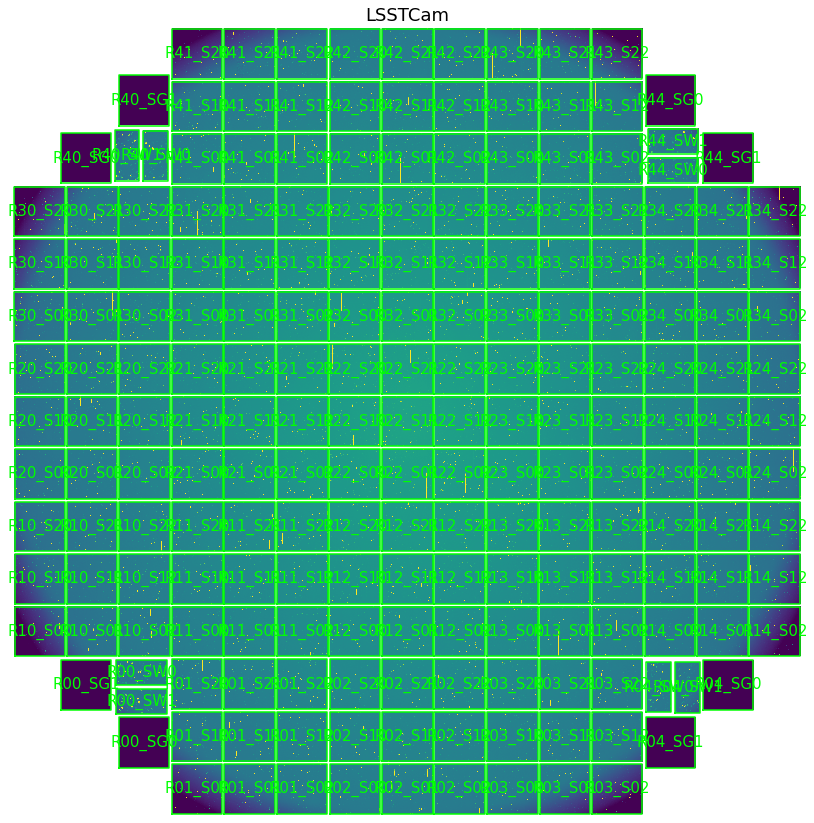

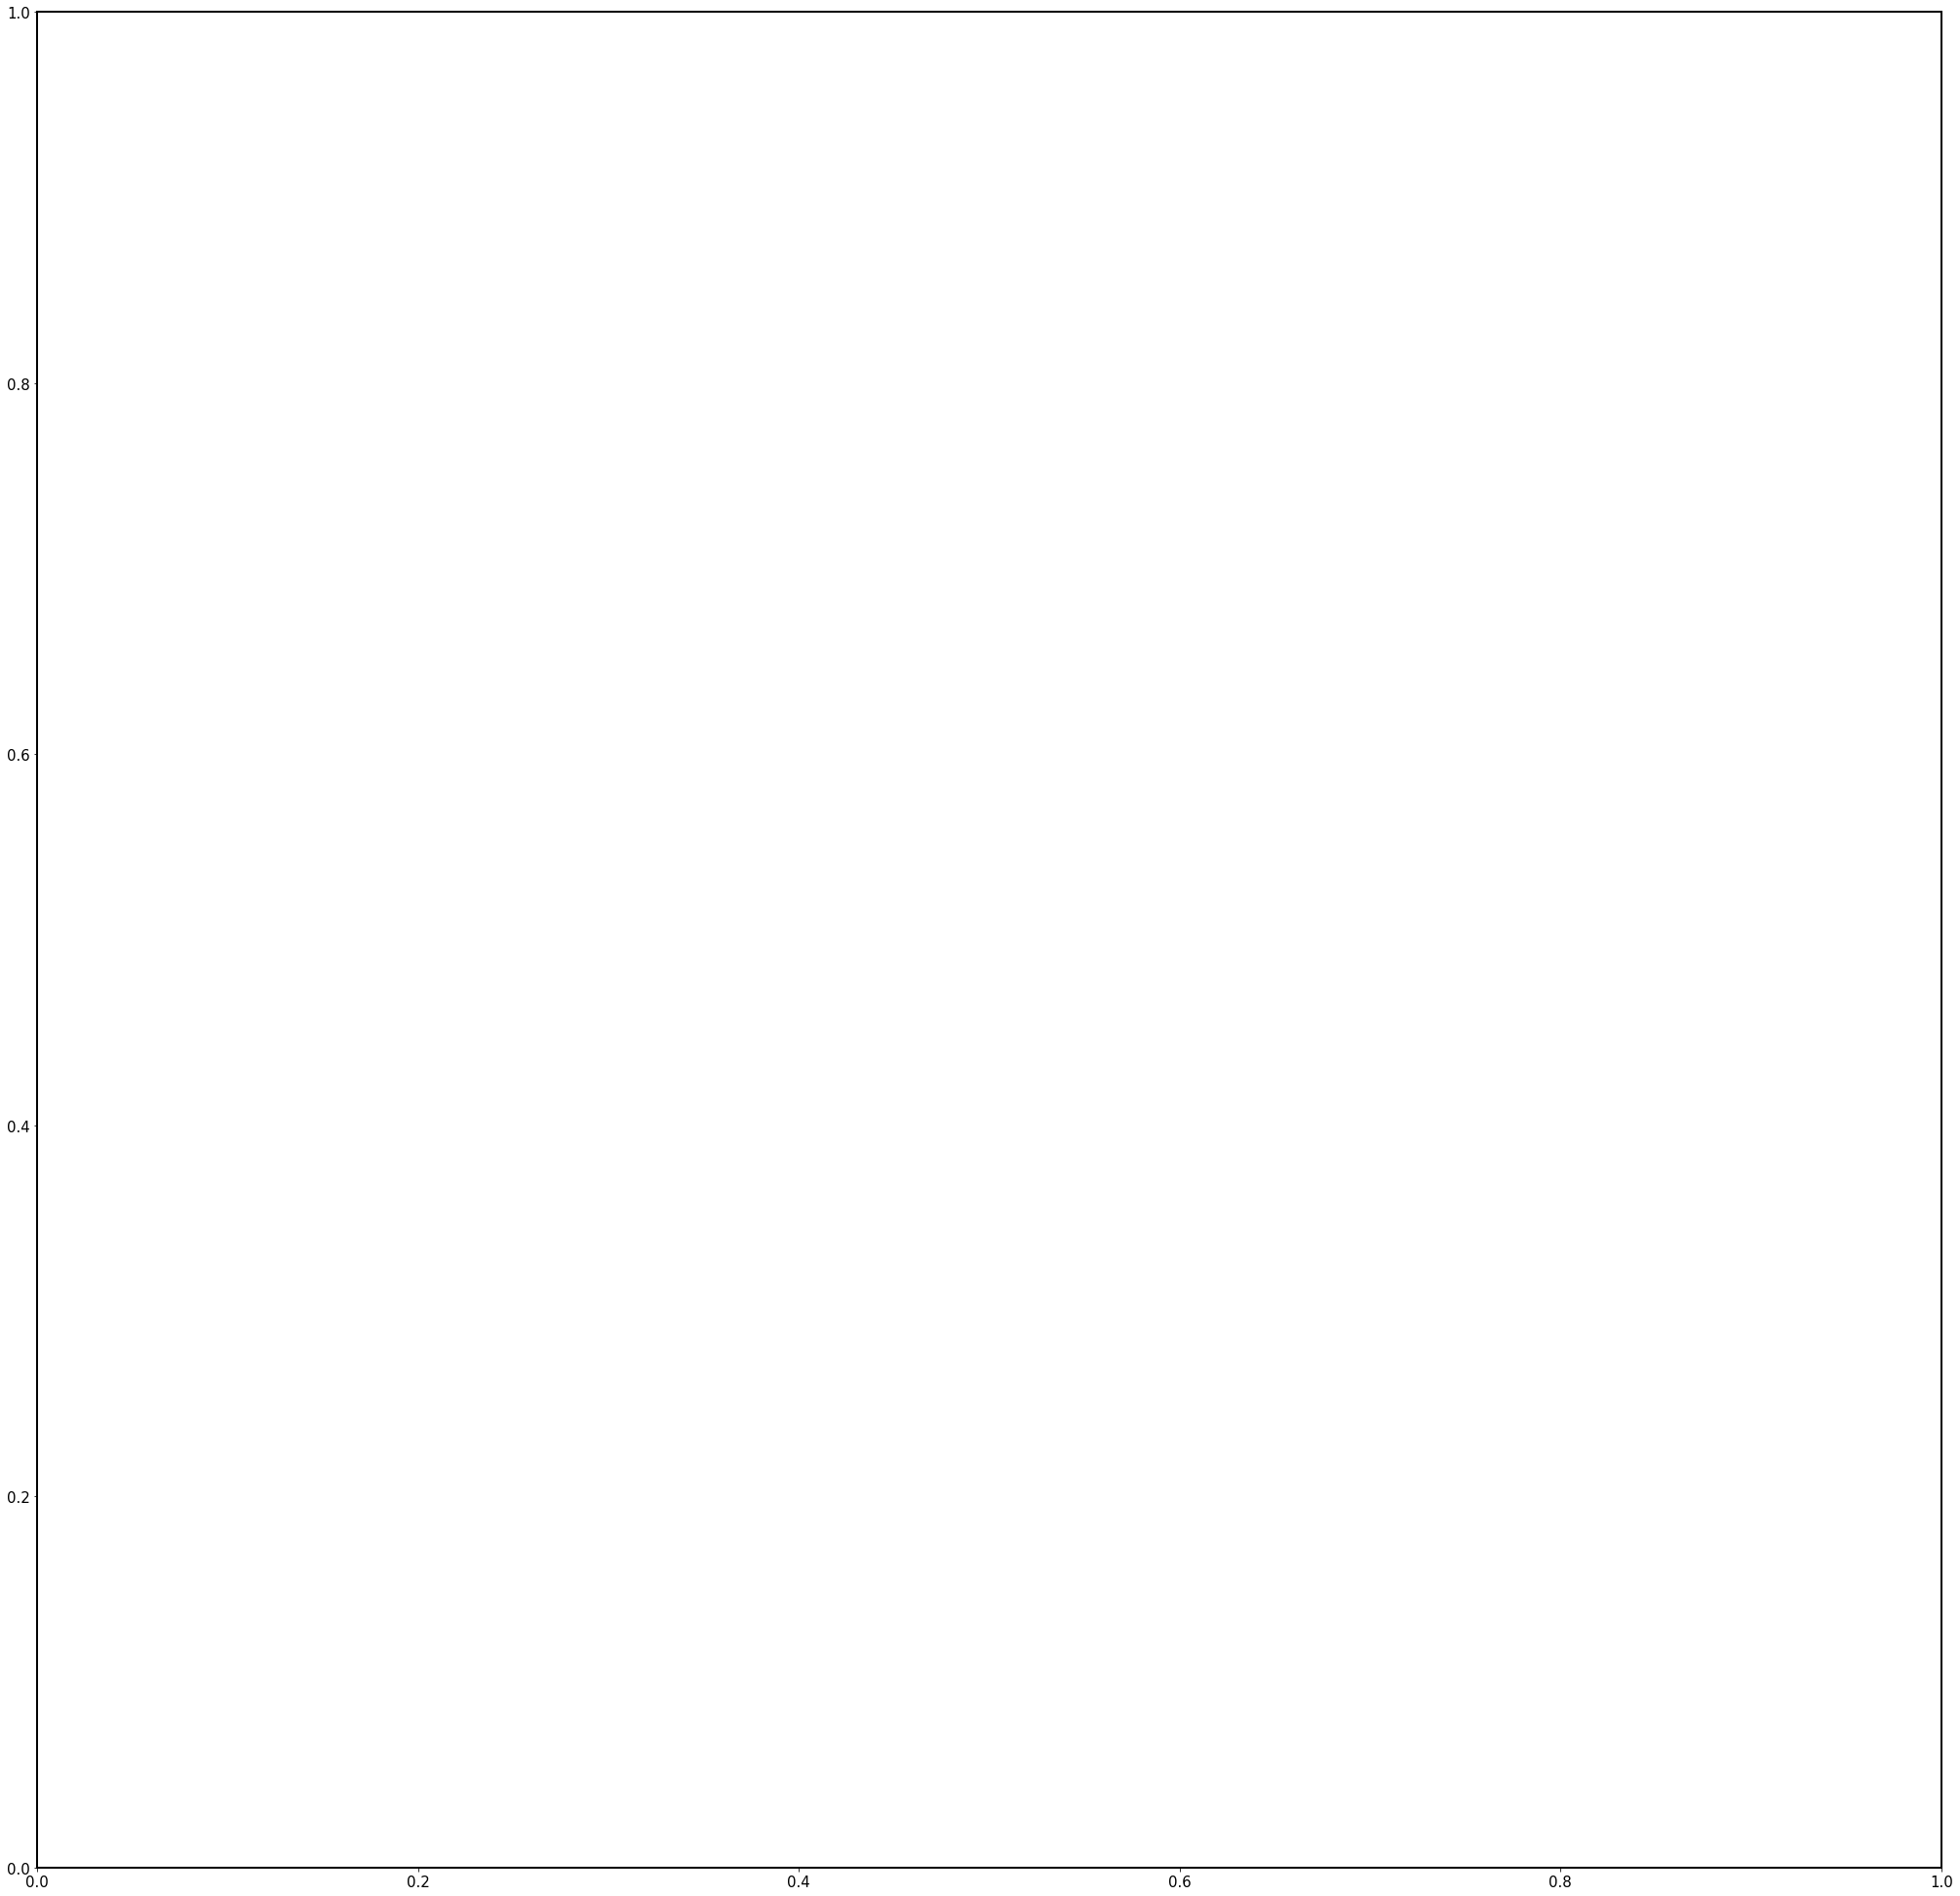

In [4]:
instrument='LSSTCam'
repo_dir = '/project/scichris/aos/AOS/DM-28360/lsstCam/med/focal/9011021/DATA/'
mos = func.plot_cameraGeom(repo_dir = repo_dir,
                      detectorNameList=None)  # in DVCS 
fig,ax = plt.subplots(1,1,figsize=(35,35))
zscale = ZScaleInterval()
vmin, vmax = zscale.get_limits(mos.array)


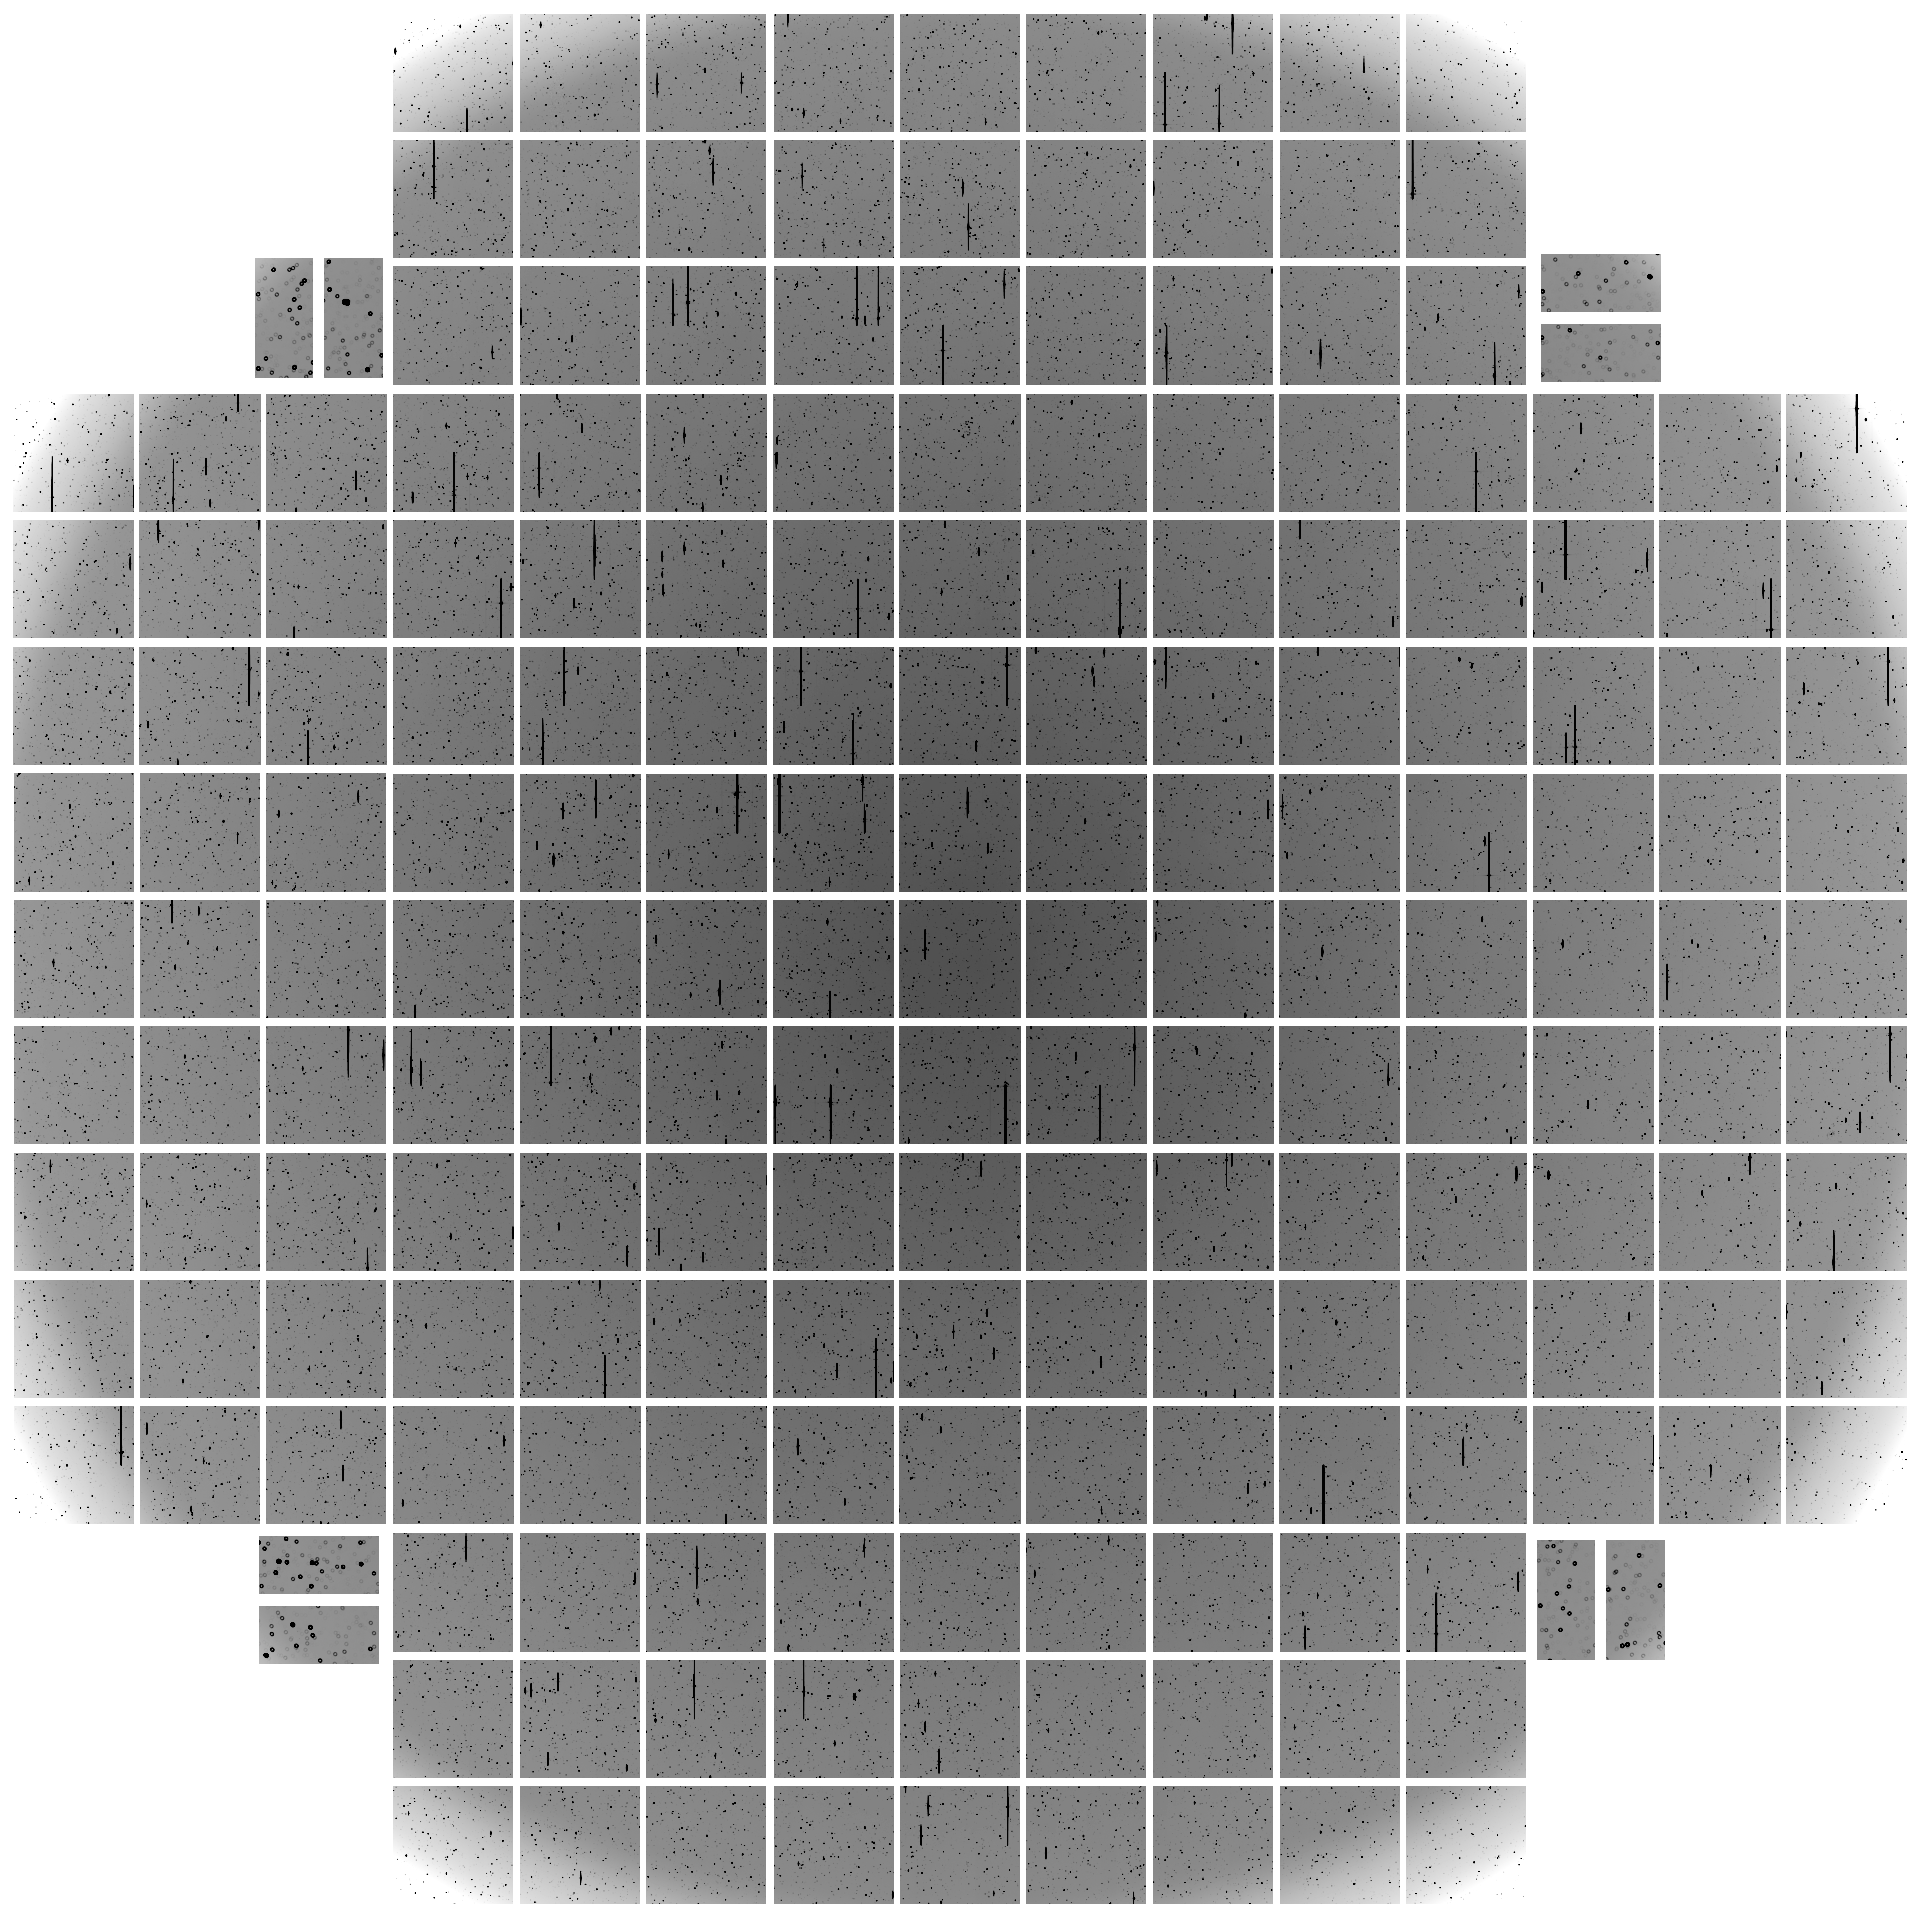

In [9]:
fig,ax = plt.subplots(1,1,figsize=(35,35))
zscale = ZScaleInterval()
vmin, vmax = zscale.get_limits(mos.array)

# in CCS 
ax.imshow(mos.array, origin='lower', vmax=vmax, vmin=vmin, cmap='gray_r')
ax.axis("off")
plt.savefig('lsstCam_med_Pert00_qck_focal_bw.png', bbox_inches='tight',dpi=150)
